## IMHOTEP: Plots of the 3 maps of interannual variations of Sea Surface Salinity due to : the atmospheric forcing, intrinsic variability and runoffs


Notebook to illustrate how to:

1. Compute the detrended timeseries of each members from EGAI and ES
2. Compute the ensemble mean of the detrended timeseries for EGAI and ES
3. Compute and plot the time std of the ensemble mean of the detrended timeseries of ES members: std_T(<'ES'_dt>): **INTERANNUAL VARIATIONS OF SSS DUE TO ATMOSPHERIC FORCING**
4. Compute and plot the ensemble std of the detrended timeseries of ES members: std_E('ES'_dt): **INTERANNUAL VARIATIONS OF SSS DUE TO INTRINSIC VARIABILITY**
5. Compute and plot the difference of the time std of the ensemble mean of the detrended timeseries of ES members and EGAI members: std_T(<'EGAI'_dt>)- std_T(<'ES'_dt>) : **INTERANNUAL VARIATIONS OF SSS DUE TO RUNOFFS**


## Import modules

In [2]:
# standard libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


### **1. Compute the detrended timeseries of each members from EGAI and ES**

#### Namelist

In [3]:
prefix = "eORCA025.L75-IMHOTEP"

# variable name of runoffs
varnarnf = 'sornf'

# variable name of SSS
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

NE=10

# file type
fileType = "gridTsurf"

# path for data (experiments)
#diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
#diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

# data output directory
#dirdat="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Data/TREND_ncfiles/1y/"+prefixexp+"/"

# full file names
#sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")

# ======== RUNOFFS
# file list
#rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")

#### Compute the detrended timeseries of each members from EGAI

In [4]:
# EGAI: this is experiment EGAI (ensemble simulation) 
prefixexp = "EGAI"

#We do a loop so each member of the experiement (from 1 to 10) can be: selected, loaded, detrended, the detrended timeseries are then concatenated in the DataArray 'alldt' 
for i in range(NE):
    
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1)  
    else:
        nexp = prefixexp+".00"+str(i+1)
    print(nexp)
    
    # path for data (experiments)
    diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)
    
    # We find the file corresponding to the member nexp of the experiment
    sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf") 
    print(sssfiles)
    
    # We select the file to prepare the data loading
    DAT = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri) 
    
    # Here the data is loaded, we can now use DAT.data to have access to the DataArray containing the SSS (data before detrending)
    DAT.loaddata() 
    
    # Here the data is detrended, we can now use DAT.atr to have access to the DataArray containing the trend of the data
    DAT.detrend() 
    
    # concat detrended timeseries with previously members
    if (i+1 == 1):
        alldtEGAI = DAT.data_dt
    else:
        alldtEGAI = xr.concat([alldtEGAI, DAT.data_dt], "e")

EGAI.001
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*gridTsurf.nc
EGAI.002
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.002-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.002*gridTsurf.nc
EGAI.003
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.003-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.003*gridTsurf.nc
EGAI.004
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.004-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.004*gridTsurf.nc
EGAI.005
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.005-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.005*gridTsurf.nc
EGAI.006
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.006-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.006*gridTsurf.nc
EGAI.007
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.007-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.007*gridTsurf.nc
EGAI.008
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTE

#### Compute the detrended timeseries of each members from ES

In [5]:
# ES: this is experiment ES (ensemble simulation) 
prefixexp = "ES"

#We do a loop so each member of the experiement (from 1 to 10) can be: selected, loaded, detrended, the detrended timeseries are then concatenated in the DataArray 'alldt' 
for i in range(NE):
    
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1)  
    else:
        nexp = prefixexp+".00"+str(i+1)
    print(nexp)
    
    # path for data (experiments)
    diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)
    
    # We find the file corresponding to the member nexp of the experiment
    sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf") 
    print(sssfiles)
    
    # We select the file to prepare the data loading
    DAT = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri) 
    
    # Here the data is loaded, we can now use DAT.data to have access to the DataArray containing the SSS (data before detrending)
    DAT.loaddata() 
    
    # Here the data is detrended, we can now use DAT.atr to have access to the DataArray containing the trend of the data
    DAT.detrend() 
    
    # concat detrended timeseries with previously members
    if (i+1 == 1):
        alldtES = DAT.data_dt
    else:
        alldtES = xr.concat([alldtES, DAT.data_dt], "e")

ES.001
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.001-S/1y/????/eORCA025.L75-IMHOTEP.ES.001*gridTsurf.nc
ES.002
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.002-S/1y/????/eORCA025.L75-IMHOTEP.ES.002*gridTsurf.nc
ES.003
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.003-S/1y/????/eORCA025.L75-IMHOTEP.ES.003*gridTsurf.nc
ES.004
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.004-S/1y/????/eORCA025.L75-IMHOTEP.ES.004*gridTsurf.nc
ES.005
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.005-S/1y/????/eORCA025.L75-IMHOTEP.ES.005*gridTsurf.nc
ES.006
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.006-S/1y/????/eORCA025.L75-IMHOTEP.ES.006*gridTsurf.nc
ES.007
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.007-S/1y/????/eORCA025.L75-IMHOTEP.ES.007*gridTsurf.nc
ES.008
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.008-S/1y/????/eORCA025.L75-IMHOTEP.ES.0

### **2. Compute the ensemble mean of the detrended timeseries for EGAI and ES** 

* Ensemble mean of the detrended timeseries of EGAI members

In [6]:
emdtEGAI = alldtEGAI.mean(dim='e').compute()
emdtEGAI

<xarray.DataArray (time_counter: 39, y: 1207, x: 1442)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x

* Ensemble mean of the detrended timeseries of ES members

In [7]:
emdtES = alldtES.mean(dim='e').compute()
emdtES

<xarray.DataArray (time_counter: 39, y: 1207, x: 1442)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x

### **3. Compute and plot the time std of the ensemble mean of the detrended timeseries of ES members**

**<span style='color:red'> Interannual variations of SSS due to atmospheric forcing </span>**

* Time std of the ensemble mean of the detrended timeseries of ES members

In [8]:
tstdES = emdtES.std(dim='time_counter').compute()
tstdES

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

* load some grid info if you need to plot maps

In [8]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* define some  default color parameters and grid parameters 

In [232]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[0,1.85,0.05]
pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [233]:
# We want to plot the time std:
data2plot = tstdES

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

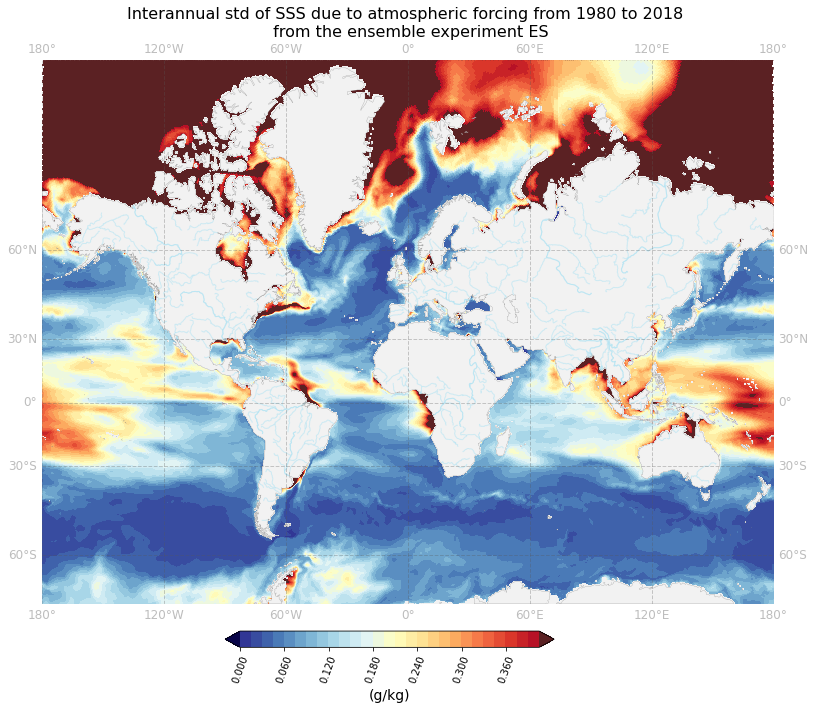

In [234]:
# name of the file in case you want to save it 
namo="stdGLO_AtmForc_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdGLO/from-0-to-0.415_"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(g/kg)')
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to atmospheric forcing from 1980 to 2018 \n from the ensemble experiment ES',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)



* Plot on the selected region : Amazon river mouth (+Mexican Gulf)

In [49]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [50]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,2.05,0.05]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [51]:
# We want to plot the time std:
data2plot = tstdES

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

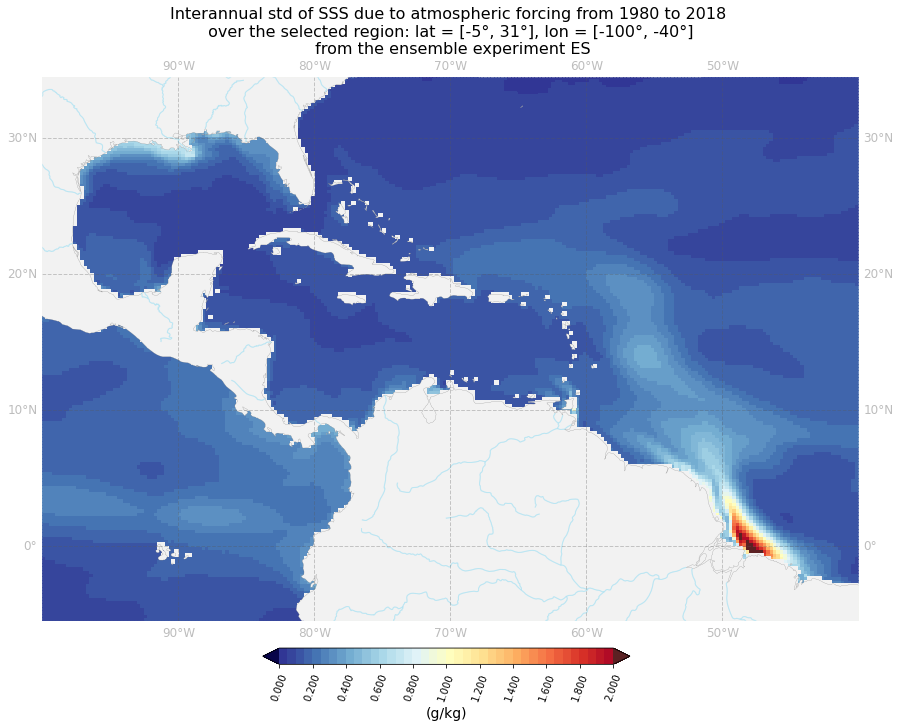

In [52]:
# name of the file
namo="stdREG2_AtmForc_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdREG/from-0-to-2_"

#========= CREATE FIGURE
fig1reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig1reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(g/kg)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to atmospheric forcing from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°] \n from the ensemble experiment ES',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig1reg,diro,namo,dpifig=300)


### **4. Compute and plot the ensemble std of the detrended timeseries of ES members**

**<span style='color:red'> Interannual variations of SSS due the intrinsic variability </span>**

* Ensemble std of the detrended timeseries of ES members

In [9]:
estdES = alldtES.std(dim='e').compute()
estdES

<xarray.DataArray (time_counter: 39, y: 1207, x: 1442)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x

In [10]:
tmestdES = estdES.mean(dim='time_counter').compute()

* load some grid info if you need to plot maps

In [16]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* define some default color parameters and grid parameters

In [17]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[0,1.85,0.05]
pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [17]:
# We want to plot the time mean of the time std:
data2plot = tmestdES

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

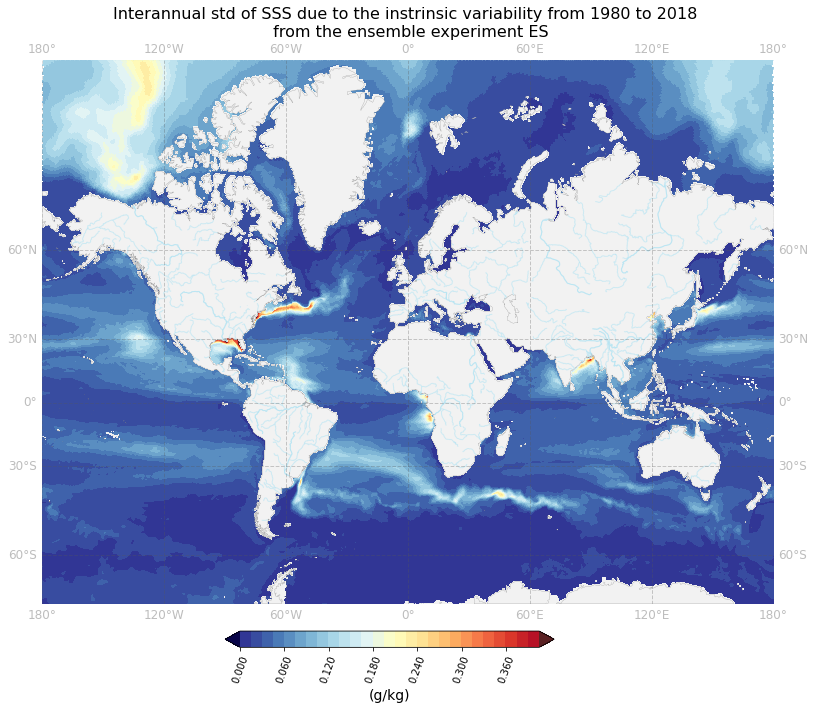

In [240]:
# name of the file
namo="stdGLO_Intrins_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdGLO/from-0-to-0.415_"

#========= CREATE FIGURE
fig2 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(g/kg)')
cb = li.Faddcolorbar(fig2,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to the instrinsic variability from 1980 to 2018 \n from the ensemble experiment ES',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig2,diro,namo,dpifig=300)

* Plot on the selected region : Amazon river mouth (+Mexican Gulf)

In [53]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [54]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

ltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,2.05,0.05]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [55]:
# We want to plot the time mean of the time std:
data2plot = tmestdES

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

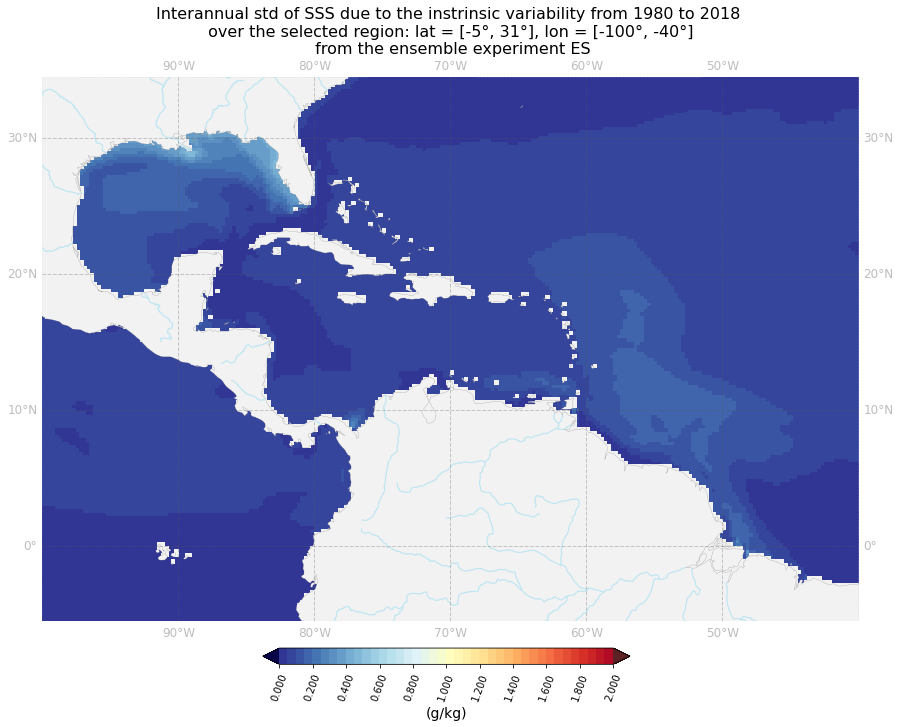

In [56]:
# name of the file
namo="stdREG2_Intrins_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdREG/from-0-to-2_"

#========= CREATE FIGURE
fig2reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig2reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(g/kg)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to the instrinsic variability from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°] \n from the ensemble experiment ES',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig2reg,diro,namo,dpifig=300)

### **5. Compute and plot the difference of the time std of the ensemble mean of the detrended timeseries of ES members and EGAI members:**

**<span style='color:red'> Interannual variations of SSS due to runoffs </span>**

* time std of the sensemble mean of the detrended timeseries of EGAI members

In [11]:
tstdEGAI = emdtEGAI.std(dim='time_counter').compute()
tstdEGAI

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

* Computation of the difference: tstd<'EGAI'> - tstd<'ES'>

In [12]:
difftstd = tstdEGAI - tstdES
difftstd

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

* load some grid info if you need to plot maps

In [15]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* define some default color parameters and grid parameters


In [16]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-0.05,0.055,0.005]
#pltcolparam['levbounds']=[0,1.85,0.05]
#pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [17]:
# We want to plot the time std:
data2plot = difftstd

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

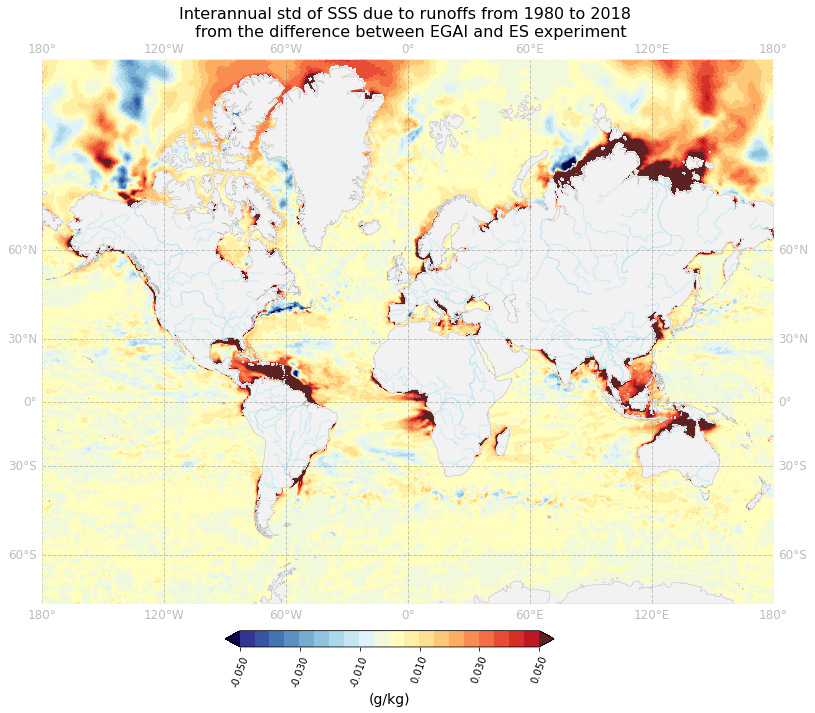

In [324]:
# name of the file
namo="stdGLO_Runoffs_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdGLO/from-0.05-to-0.055_"

#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(g/kg)')
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to runoffs from 1980 to 2018 \n from the difference between EGAI and ES experiment',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig3,diro,namo,dpifig=300)

* Plot on the selected region : Amazon river mouth (+Mexican Gulf)

In [60]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [61]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-0.1,0.105,0.005]
pltcolparam['levbounds']=[0,2.05,0.05]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [62]:
# We want to plot the time std:
data2plot = difftstd

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

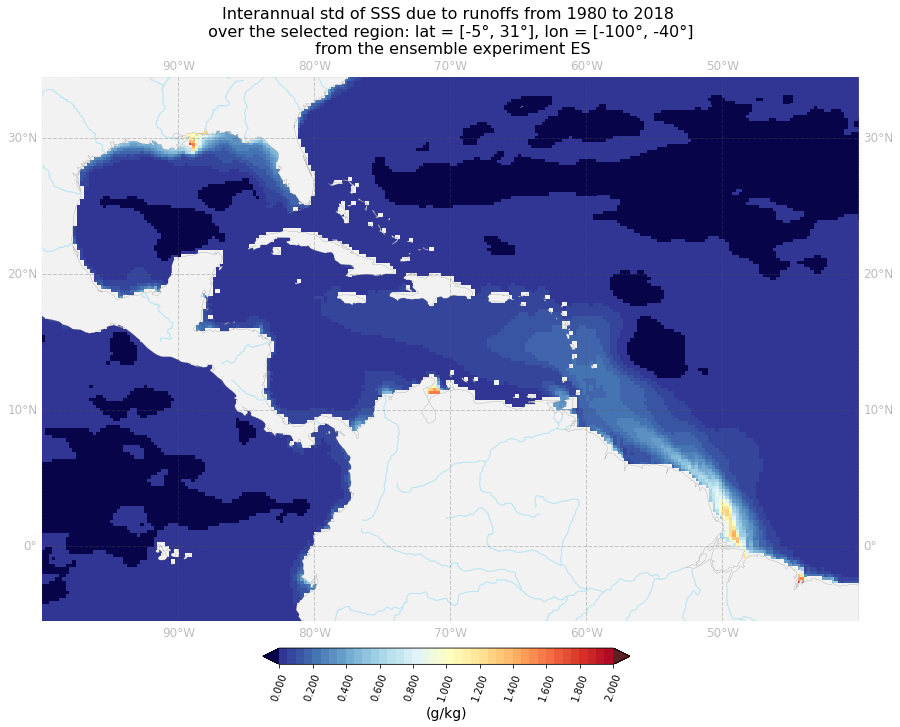

In [63]:
# name of the file
namo="stdREG2_Runoffs_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/stdREG/from-0-to-2_"

#========= CREATE FIGURE
fig3reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig3reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(g/kg)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS due to runoffs from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°] \n from the ensemble experiment ES',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig3reg,diro,namo,dpifig=300)

### **6. Compute and plot the total interannual std of SSS**


* Sum of the intrinsic, atmospheric forcing and runoffs variability

In [13]:
totalstd = tstdES + tmestdES + difftstd
totalstd

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

* load some grid info if you need to plot maps



In [21]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* define some default color parameters and grid parameters

In [330]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,1.85,0.05]
#pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [331]:
# We want to plot the time std:
data2plot = totalstd

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

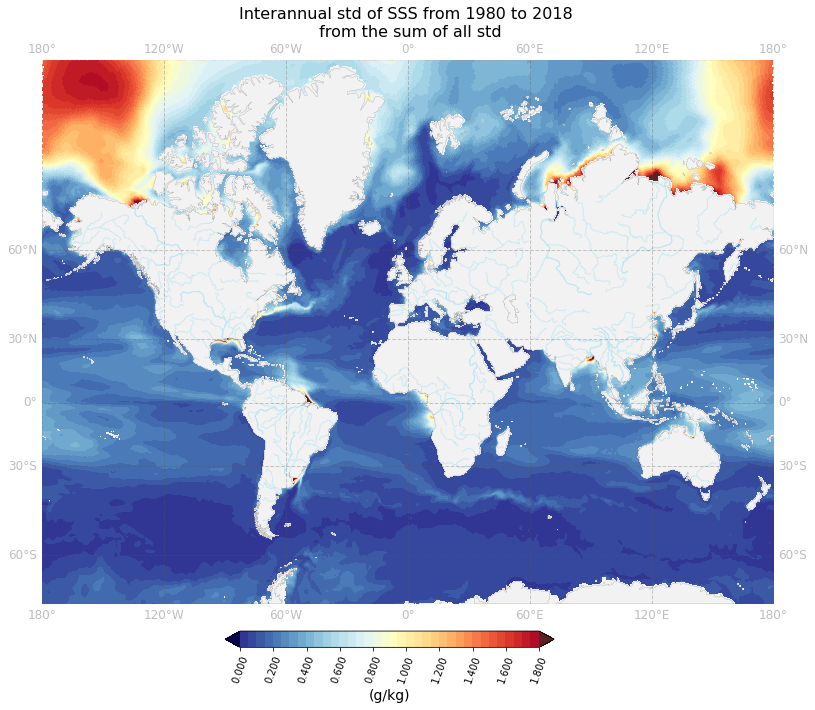

In [336]:
# name of the file
namo="totalstd_ES_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/from-0-to-1.8_"

#========= CREATE FIGURE
fig4 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(g/kg)')
cb = li.Faddcolorbar(fig4,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Interannual std of SSS from 1980 to 2018 \n from the sum of all std',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig4,diro,namo,dpifig=300)

### **7. Ratio plots**

* Compute the ratio of atmospheric forcing std over the total std



In [14]:
ratstdA = (tstdES/totalstd)*100
ratstdA

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

In [24]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [22]:
# We want to plot the time std:
data2plot = ratstdA

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

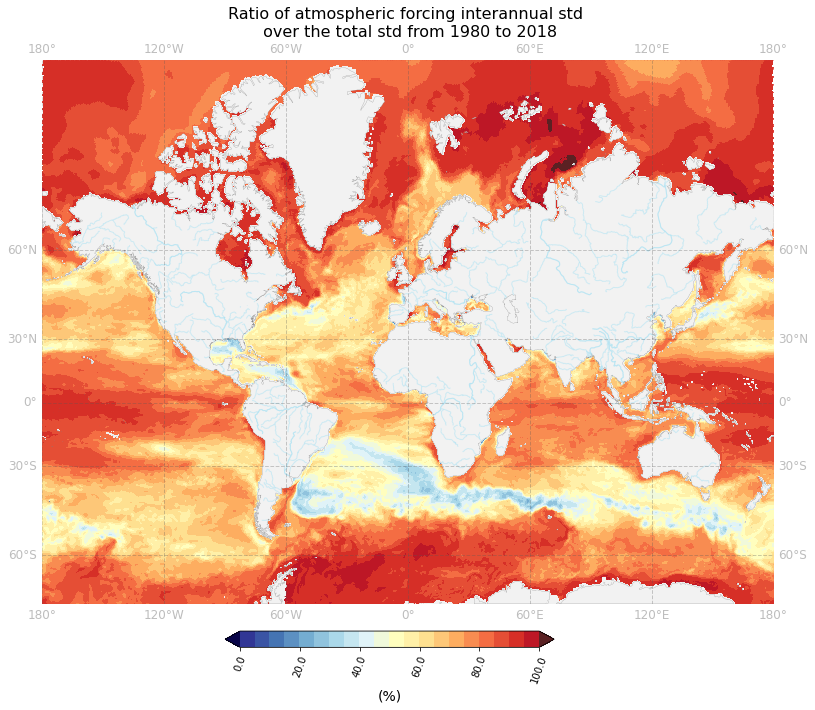

In [377]:
# name of the file
namo="ratstdA_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig5 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(%)')
cb = li.Faddcolorbar(fig5,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of atmospheric forcing interannual std \n over the total std from 1980 to 2018',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig5,diro,namo,dpifig=300)

REGIONAL PLOT

In [25]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [29]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [23]:
# We want to plot the time std:
data2plot = ratstdA

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

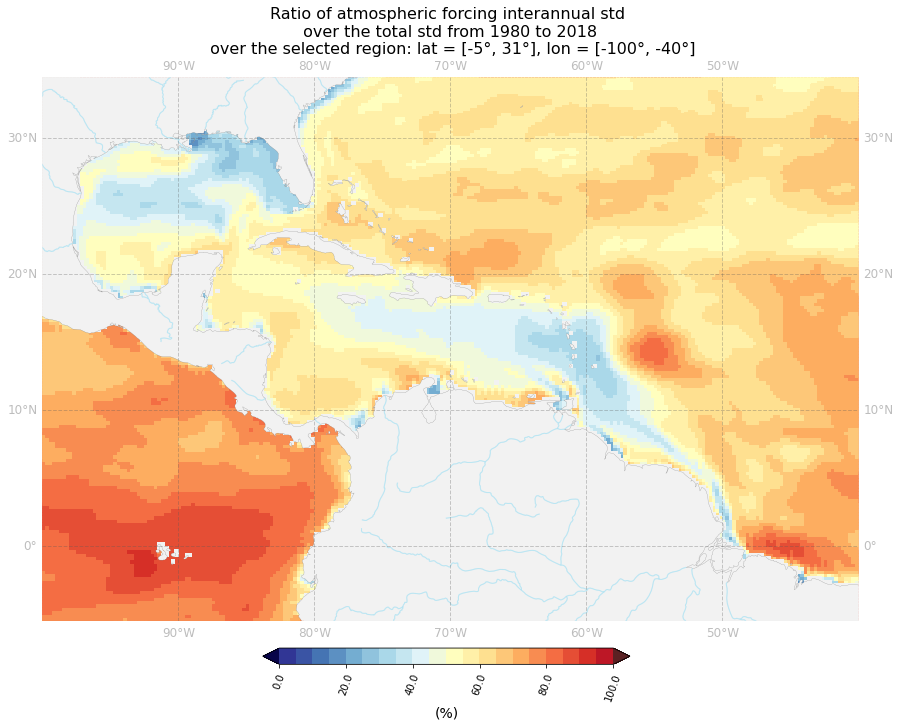

In [30]:
# name of the file
namo="ratstdA_REG2_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig5reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig5reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(%)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of atmospheric forcing interannual std \n over the total std from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°]',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig5reg,diro,namo,dpifig=300)

* Compute the ratio of intrinsic std over the total std

In [15]:
ratstdI = (tmestdES/totalstd)*100
ratstdI

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

In [22]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [23]:
# We want to plot the time std:
data2plot = ratstdI

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

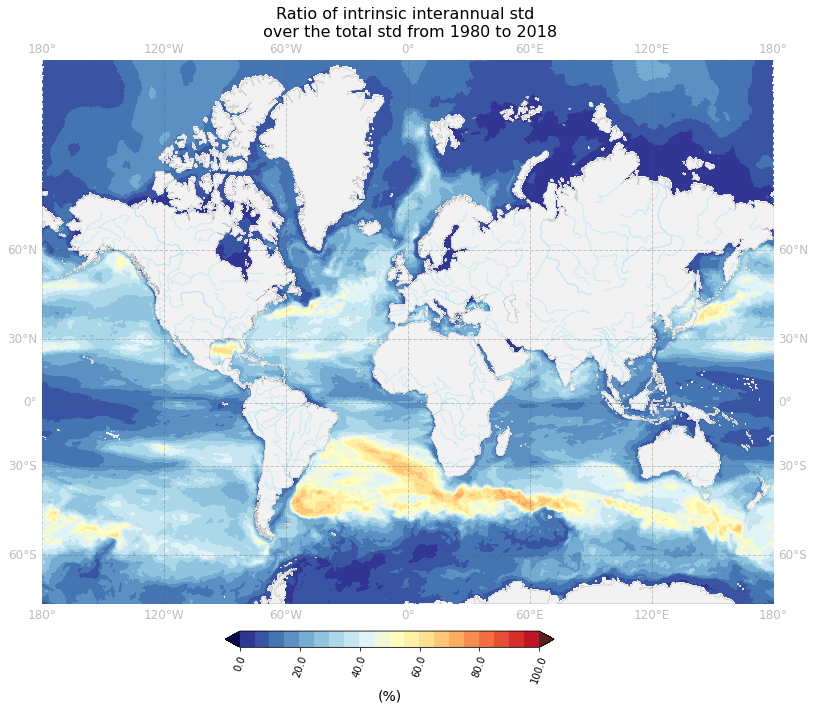

In [24]:
# name of the file
namo="ratstdI_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig6 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(%)')
cb = li.Faddcolorbar(fig6,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of intrinsic interannual std \n over the total std from 1980 to 2018',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig6,diro,namo,dpifig=300)

REGIONAL PLOT

In [31]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [37]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

ltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [39]:
# We want to plot the time std:
data2plot = ratstdI

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

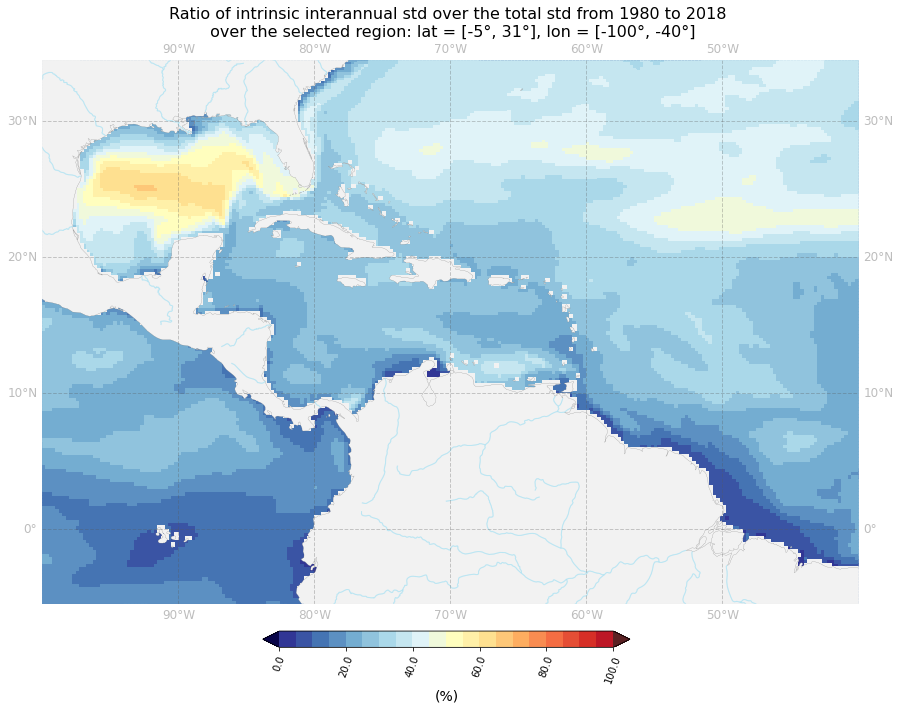

In [40]:
# name of the file
namo="ratstdI_REG2_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig6reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig6reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(%)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of intrinsic interannual std over the total std from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°]',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig6reg,diro,namo,dpifig=300)

* Compute the ratio of runoffs std over the total std

In [16]:
ratstdR = (difftstd/totalstd)*100
ratstdR

<xarray.DataArray (y: 1207, x: 1442)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x

In [381]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.415,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [382]:
# We want to plot the time std:
data2plot = ratstdR

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

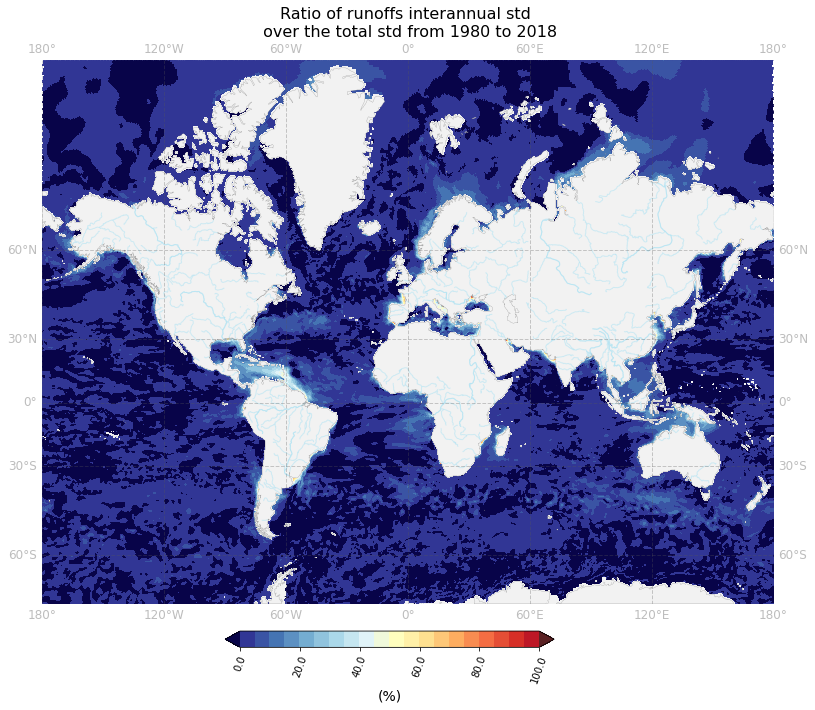

In [384]:
# name of the file
namo="ratstdR_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig7 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('(%)')
cb = li.Faddcolorbar(fig7,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.20,-0.25,0.9,0.2))  
#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of runoffs interannual std \n over the total std from 1980 to 2018',fontsize=16)

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig7,diro,namo,dpifig=300)

REGIONAL PLOT

In [45]:
# latitude and longitude values you want to select the region over
#lonselect=[-65,-40]
#latselect=[-2,17]

lonselect=[-100,-40]
latselect=[-5,31]

In [46]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

ltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[0,105,5]
#pltcolparam['levbounds']=[0,0.315,0.015]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [47]:
# We want to plot the time std:
data2plot = ratstdR

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

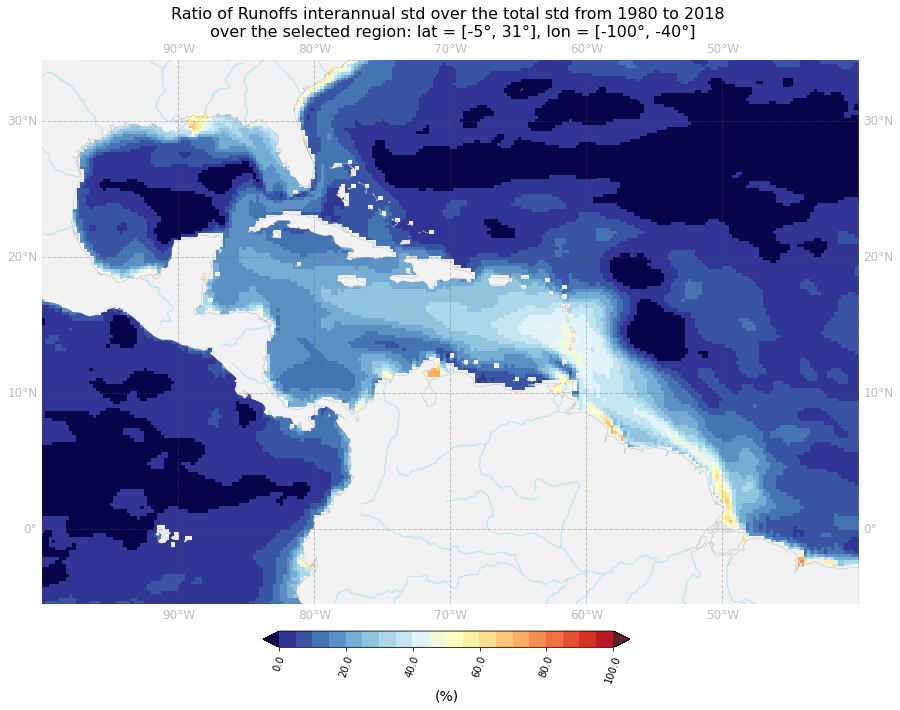

In [48]:
# name of the file
namo="ratstdR_REG2_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/"

#========= CREATE FIGURE
fig7reg = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD COLORBAR
#tlabel=li.Fdeftlabel(strunits='g/kg',fo=fo)
cb = li.Faddcolorbar(fig7reg,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(%)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of Runoffs interannual std over the total std from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°]',fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
li.Fsaveplt(fig7reg,diro,namo,dpifig=300)